<a href="https://colab.research.google.com/github/BryanYuen0205/COMP4211_Kaggle_Comp/blob/BERT/COMP4211KaggleBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle

---



In [ ]:
# Installing the necessary libraries
!pip install transformers==4.36.2 datasets==2.16.1 seqeval peft==0.13.2 evaluate accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
# Import the necessary libraries
import ast
from datasets import Dataset # Import the Hugging Face Datasets library's Dataset class
import pandas as pd
import numpy as np
from collections import Counter
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuenbryanqiwen","key":"c2321ff86f79898992b270a75af32a13"}'}

In [ ]:
# Creating a kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the kaggle competition dataset
!kaggle competitions download -c comp-4211-spring-25-project

In [ ]:
# Unziping the dataset
!unzip -q comp-4211-spring-25-project.zip -d ./data

In [ ]:
# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# View first few rows of the train and test data
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())


Train Data:


,id,Sentence,NER Tag
0,0,"['Thousands', 'of', 'demonstrators', 'have', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,1,"['Iranian', 'officials', 'say', 'they', 'expec...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."


Test Data:


,id,Sentence
0,0,"['Pakistani', 'officials', 'say', 'unidentifie..."
1,1,"['China', ""'s"", 'official', 'Xinhua', 'news', ..."
2,2,"['News', 'reports', 'say', 'since', '1998', ',..."
3,3,"['French', 'tennis', 'great', 'Mary', 'Pierce'..."
4,4,"['Now', 'ranked', '29th', 'in', 'the', 'world'..."


# Data Preprocessing

---



In [ ]:
# Convert string representations of lists to actual lists
train_df["NER Tag"] = train_df["NER Tag"].apply(ast.literal_eval)
train_df["Sentence"] = train_df["Sentence"].apply(ast.literal_eval)
test_df["Sentence"] = test_df["Sentence"].apply(ast.literal_eval)

In [ ]:
# Converting the train and test datasets to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Split the training dataset into 20% validation data and 80% training data
dataset = train_dataset.train_test_split(test_size=0.2)

In [ ]:
# Loading a pre-trained BERT tokenizer from Hugging Face’s model hub
# Tokenizers convert raw text into numerical format required by BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
# Display the unique NER Tags
label_list = [tag for sublist in train_df["NER Tag"] for tag in sublist]
label_list = sorted(set(label_list))

# Convert NER Tags to ids
label_to_id = {tag:index for index, tag in enumerate(label_list)}
id_to_label = {index:tag for index, tag in enumerate(label_list)}

print("Unique NER Tags:", label_list)
print("Label to id:", label_to_id)
print("id to Lavel:", id_to_label)

Unique NER Tags: ['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org', 'I-per', 'I-tim', 'O']
Label to id: {'B-art': 0, 'B-eve': 1, 'B-geo': 2, 'B-gpe': 3, 'B-nat': 4, 'B-org': 5, 'B-per': 6, 'B-tim': 7, 'I-art': 8, 'I-eve': 9, 'I-geo': 10, 'I-gpe': 11, 'I-nat': 12, 'I-org': 13, 'I-per': 14, 'I-tim': 15, 'O': 16}
id to Lavel: {0: 'B-art', 1: 'B-eve', 2: 'B-geo', 3: 'B-gpe', 4: 'B-nat', 5: 'B-org', 6: 'B-per', 7: 'B-tim', 8: 'I-art', 9: 'I-eve', 10: 'I-geo', 11: 'I-gpe', 12: 'I-nat', 13: 'I-org', 14: 'I-per', 15: 'I-tim', 16: 'O'}


In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["Sentence"], # List of tokenized sentences from dataset
        is_split_into_words=True, # Each input is split into tokens, and not raw text
        truncation=True, # Truncates if sentence is longer than max_length
        padding="max_length", # Tokenized sequences are padded with special tokens
        max_length=128, # Maximum length
    )

    # BERT uses subword tokenizer. Align NER labels to the tokenized subword sequence
    labels = []
    for i, label in enumerate(examples["NER Tag"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100) # If token is a special token, assign a label of -100. Token ignored during training
            elif word_idx != previous_word_idx:
                label_ids.append(label_to_id[label[word_idx]]) # If token is the first subword of a new word, assign correct NER label
            else:
                label_ids.append(-100) # if the token is a subsequent subword, assign a label of -100. Token ignored during training
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_dataset = dataset.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/32000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

# Compiling and Training the Model

---



In [ ]:
# Load a pre-trained BERT model
model = AutoModelForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(label_to_id),
    id2label={i: label for i, label in enumerate(label_list)},
    label2id={label: i for i, label in enumerate(label_list)},
)

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Customized BERT Model with fine tuning layer
import torch
import torch.nn as nn
from transformers import AutoModel, AutoConfig

class CustomBERTForTokenClassification(nn.Module):
    def __init__(self, model_name, num_labels):
        super(CustomBERTForTokenClassification, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 256),
            # nn.BatchNorm1d(256), # Testing with Batch normalization
            nn.LayerNorm(256), # Testing with LayerNorm which is better for Transformers
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_labels)
        )

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=True,
        )
        sequence_output = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)

        sequence_output = self.dropout(sequence_output)
        # logits = self.classifier(sequence_output)

        batch_size, seq_len, hidden_dim = sequence_output.shape
        x = sequence_output.view(-1, hidden_dim)  # (batch_size * seq_len, hidden_dim)

        x = self.classifier(x)  # pass through classifier

        logits = x.view(batch_size, seq_len, -1)  # reshape back

        loss = None

        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            # Flatten the tokens
            loss = loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))

        if loss is not None:
            return {"loss": loss, "logits": logits}
        else:
            return {"logits": logits}

    def save_pretrained(self, save_directory):
        # Save the inner BERT model
        self.bert.save_pretrained(save_directory)

        # Save the classifier separately
        torch.save(self.classifier.state_dict(), f"{save_directory}/classifier.pt")

        # Save additional information like number of labels
        torch.save({
            "num_labels": self.classifier[-1].out_features
        }, f"{save_directory}/custom_config.pt")

    @classmethod
    def from_pretrained(cls, load_directory):
        # Load saved information
        config = torch.load(f"{load_directory}/custom_config.pt")
        num_labels = config["num_labels"]

        # Instantiate the model
        model = cls(model_name=load_directory, num_labels=num_labels)

        # Load pretrained BERT
        model.bert = AutoModel.from_pretrained(load_directory)

        # Load classifier head
        model.classifier.load_state_dict(torch.load(f"{load_directory}/classifier.pt"))

        return model



In [ ]:
# # Customized BERT Model with CNN
# import torch
# import torch.nn as nn
# from transformers import AutoModel, AutoConfig

# class CustomBERTForTokenClassification(nn.Module):
#     def __init__(self, model_name, num_labels):
#         super(CustomBERTForTokenClassification, self).__init__()
#         self.bert = AutoModel.from_pretrained(model_name)

#         self.conv1d = nn.Conv1d( # Testing using CNN
#                 in_channels=self.bert.config.hidden_size,
#                 out_channels=256,
#                 kernel_size=3,
#                 padding=1  # keep the sequence length same
#         )
#         hidden_size = 256

#         self.dropout = nn.Dropout(0.5) # Increasing dropout from 0.3 to 0.5 for CNN

#         self.classifier = nn.Sequential(
#             nn.Linear(256, 256),
#             # nn.BatchNorm1d(256), # Testing with Batch normalization
#             nn.LayerNorm(256), # Testing with LayerNorm which is better for Transformers
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(256, num_labels)
#         )

#     def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None):
#       outputs = self.bert(
#           input_ids=input_ids,
#           attention_mask=attention_mask,
#           token_type_ids=token_type_ids,
#           return_dict=True,
#       )
#       sequence_output = outputs.last_hidden_state  # (batch_size, seq_len, hidden_dim)

#       sequence_output = self.dropout(sequence_output)

#       # Prepare for Conv1d: (batch_size, hidden_dim, seq_len)
#       x = sequence_output.permute(0, 2, 1)

#       # Apply Conv1d
#       x = self.conv1d(x)  # (batch_size, 256, seq_len)

#       # Prepare back to (batch_size, seq_len, hidden_dim)
#       x = x.permute(0, 2, 1)

#       # Flatten for classifier
#       batch_size, seq_len, hidden_dim = x.shape
#       x = x.reshape(-1, hidden_dim)  # (batch_size * seq_len, hidden_dim)

#       x = self.classifier(x)  # (batch_size * seq_len, num_labels)

#       # Reshape back
#       logits = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, num_labels)

#       loss = None
#       if labels is not None:
#           loss_fct = nn.CrossEntropyLoss()
#           loss = loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))

#       if loss is not None:
#           return {"loss": loss, "logits": logits}
#       else:
#           return {"logits": logits}



In [ ]:
modelCustomBert = CustomBERTForTokenClassification(
    model_name="bert-base-cased",
    num_labels=len(label_list)
)

# # Loading my trained model
# # modelCustomBert = AutoModelForTokenClassification.from_pretrained("./drive/MyDrive/Comp4211/BertModelCustomized2")

In [ ]:
def printNumberOfParams(modelName):
  total_params = sum(p.numel() for p in modelName.parameters())
  print(f"Total number of parameters: {total_params}")

printNumberOfParams(modelCustomBert)

Total number of parameters: 108512017


In [ ]:
seqeval = evaluate.load("seqeval")

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)

    true_predictions = [
        [label_list[p] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [ ]:
# TrainingArguments class contains all the hyperparameters the Trainer will use for training and evaluation
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    report_to=[],
    learning_rate=5e-5,
    per_device_train_batch_size=16, # Batch size of 16 works better
    per_device_eval_batch_size=16,
    num_train_epochs=3, # Trying to reduce training epoch to 2 (originally 3)
    weight_decay=0.01,
    logging_dir="./logs",
)

In [ ]:
# # training_args for early stopping
# # Instead of using epochs, now using steps

# training_args = TrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="steps",
#     report_to=[],
#     save_strategy="steps",
#     eval_steps=500,             # Evaluate every 500 steps
#     save_steps=500,             # Save every 500 steps
#     load_best_model_at_end=True,
#     metric_for_best_model="f1", # Use the F1 score for early stopping
#     greater_is_better=True,
#     learning_rate=5e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=5,         # Set higher, let early stopping decide
#     weight_decay=0.01,
#     logging_dir="./logs",
# )

In [ ]:
trainer = Trainer(
    model=modelCustomBert,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    # Testing out early stopping
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],  # Stop if no improvement for 2 evals
)

In [ ]:
# Don't run this if loading a trained model
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.108500,0.100194,0.825899,0.829445,0.827668,0.969331
2,0.076600,0.091941,0.840025,0.842965,0.841492,0.971963
3,0.051200,0.098964,0.837753,0.849168,0.843422,0.972317


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=6000, training_loss=0.09154512405395508, metrics={'train_runtime': 2401.3412, 'train_samples_per_second': 39.978, 'train_steps_per_second': 2.499, 'total_flos': 0.0, 'train_loss': 0.09154512405395508, 'epoch': 3.0})

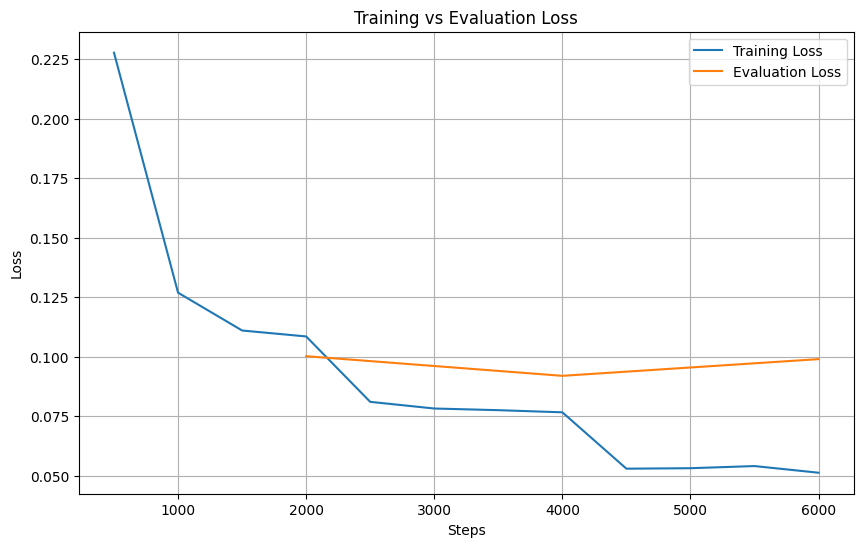

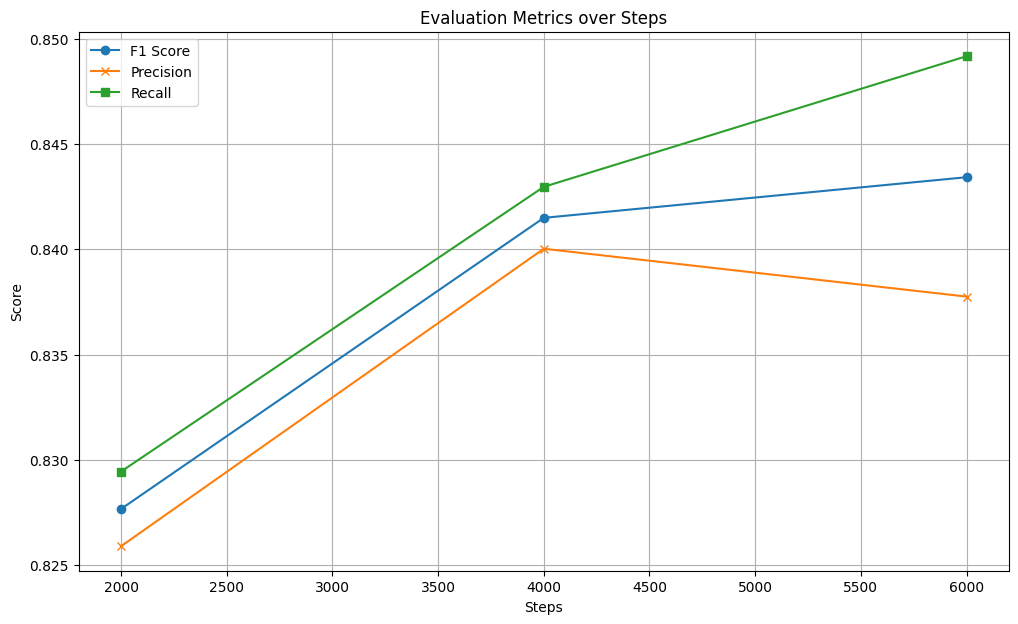

In [ ]:
import matplotlib.pyplot as plt

train_loss = []
train_steps = []
eval_loss = []
eval_steps = []
f1_scores = []
precisions = []
recalls = []

for log in trainer.state.log_history:
    if 'loss' in log.keys() and 'epoch' in log.keys():
        train_loss.append(log['loss'])
        train_steps.append(log['step'])
    if 'eval_loss' in log.keys():
        eval_loss.append(log['eval_loss'])
        if "eval_f1" in log:
            f1_scores.append(log["eval_f1"])
        if "eval_precision" in log:
            precisions.append(log["eval_precision"])
        if "eval_recall" in log:
            recalls.append(log["eval_recall"])
        eval_steps.append(log['step'])

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_loss, label='Training Loss')
plt.plot(eval_steps, eval_loss, label='Evaluation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training vs Evaluation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(eval_steps, f1_scores, marker='o', label="F1 Score")
plt.plot(eval_steps, precisions, marker='x', label="Precision")
plt.plot(eval_steps, recalls, marker='s', label="Recall")

plt.xlabel("Steps")
plt.ylabel("Score")
plt.title("Evaluation Metrics over Steps")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# trainer.save_model("./drive/MyDrive/Comp4211/BertModelCustomLN")
# modelCustomBert.save_pretrained("./drive/MyDrive/Comp4211/BertModelCustomLN")
# modelLA = CustomBERTForTokenClassification.from_pretrained("./drive/MyDrive/Comp4211/BertModelCustomLN")
# modelCustomBert.save_pretrained('./drive/MyDrive/Comp4211/BertModelCustomLNEP3')
# modelCustomBert = CustomBERTForTokenClassification.from_pretrained('./drive/MyDrive/Comp4211/BertModelCustomLNEP3')
tokenizer.save_pretrained('./drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3')



('./drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3/tokenizer_config.json',
 './drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3/special_tokens_map.json',
 './drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3/vocab.txt',
 './drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3/added_tokens.json',
 './drive/MyDrive/Comp4211/TokenizerBertModelCustomLNEP3/tokenizer.json')

# Evaluating Model on Test Data

---



In [ ]:
# Function to Tokenize the Test Data
def tokenize_test_sentences(examples):
    return tokenizer(
        examples["Sentence"],
        truncation=True,
        is_split_into_words=True,
        padding="max_length",
        return_offsets_mapping=True
)

tokenized_test_dataset = test_dataset.map(tokenize_test_sentences, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
predictions_output = trainer.predict(tokenized_test_dataset)
logits = predictions_output.predictions
predictions = np.argmax(logits, axis=2)

In [ ]:
decoded_predictions = []

for i, pred in enumerate(predictions):
    sentence_tokens = test_dataset[i]["Sentence"]  # List of words
    encoding = tokenizer(
        sentence_tokens,
        truncation=True,
        is_split_into_words=True,
        padding="max_length",
        return_offsets_mapping=True,
        return_tensors="pt"
    )

    word_ids = encoding.word_ids()
    pred_tags = []

    previous_word_idx = None
    current_word_idx = 0

    for idx, word_idx in enumerate(word_ids):
        if word_idx is None:
            continue
        if word_idx != previous_word_idx:
            tag = id_to_label[pred[idx]]
            pred_tags.append(tag)
            previous_word_idx = word_idx
            current_word_idx += 1

    # If after decoding, the number of predictions doesn't match the number of tokens, fix manually.
    num_words = len(sentence_tokens)
    if len(pred_tags) < num_words:
        # Pad with "O" if too few predictions
        pred_tags += ["O"] * (num_words - len(pred_tags))
    elif len(pred_tags) > num_words:
        # Truncate if too many
        pred_tags = pred_tags[:num_words]

    decoded_predictions.append(pred_tags)


In [ ]:
submission = pd.DataFrame({
    'id': range(len(decoded_predictions)),
    'NER Tag': [tags for tags in decoded_predictions]  # stringify the list
})
print(len(submission['NER Tag'][0]))
print(len(test_df['Sentence'][0]))

24
24


In [ ]:
submission.to_csv('drive/MyDrive/Comp4211/BERTLMEP3AGAIN.csv', index=False)